# Team 5 UBI: income vs education level

Team 5: Universal Basic Income

Author: Tsung-Han Yu

I couldn't find data that contain both income and education yet, so I use the dataset that contain poverty level instead to do the analysis.

## Data preparation

In this jupyter notebook, I'll be examining [2021 B17018](https://data.census.gov/table?t=Families+and+Household+Characteristics:Income+and+Poverty&g=050XX00US25025$1400000&tid=ACSDT5Y2021.B17018) (Poverty Status in the Past 12 Months of Families by Household Type by Educational Attainment of Householder) data.

I will first clean the data and keep only data for Boston census tracts.

In [1]:
boston_census_tracts = set(['1.01', '1.02', '1001', '1002', '1003', '1004', '1005', '1006.01', '1006.03', '1007', '1008', '1009', '101.03', '101.04', '1010.01', '1010.02', '1011.01', '1011.02', '102.04', '102.05', '102.06', '103', '104.03', '104.04', '104.05', '104.08', '105', '106', '107.01', '107.02', '108.01', '108.02', '1101.04', '1101.05', '1101.06', '1102.01', '1103.01', '1104.01', '1104.03', '1105.01', '1105.02', '1106.01', '1106.07', '1201.03', '1201.04', '1201.05', '1202.01', '1203.01', '1204', '1205', '1206', '1207', '1301.01', '1302', '1303', '1304.02', '1304.04', '1304.06', '1401.02', '1401.05', '1401.06', '1401.07', '1402.01', '1402.02', '1403', '1404', '2.01', '2.02', '201.01', '202', '203.01', '203.02', '203.04', '203.05', '3.01', '3.02', '301', '302', '303.01', '303.02', '304', '305', '4.01', '4.02', '401', '402', '403', '404.01', '406', '408.01', '5.02', '5.03', '5.05', '5.06', '501.01', '502', '503', '504', '505', '506', '507', '509.01', '510', '511.01', '512', '6.01', '6.03', '6.04', '601.01', '602', '603.01', '604', '605.01', '606.01', '606.02', '606.03', '606.04', '607', '608', '610', '611.01', '612.01', '612.02', '612.03', '612.04', '7.01', '7.03', '7.04', '701.02', '701.03', '701.04', '702.01', '702.02', '703.01', '703.02', '704.02', '705.01', '705.02', '706', '707', '708.01', '708.02', '709.01', '709.02', '711.01', '712.01', '8.04', '8.05', '8.06', '8.07', '801', '803', '804.01', '805', '806.01', '808.01', '809', '810.01', '811.01', '811.02', '812', '813.01', '813.02', '814', '815', '817', '818', '819', '820', '821', '901', '902', '903', '904', '906', '907', '909.01', '910.01', '911', '912', '913', '914', '915', '916', '917', '918', '919', '920', '921.01', '922', '923', '924', '9801.01', '9803', '9807', '9809', '9810', '9811', '9812.01', '9812.02', '9813', '9815.01', '9815.02', '9816', '9817', '9818', '9819'])

In [2]:
import pandas as pd

df = pd.read_csv('../Data/B17018.csv')
df.drop(df.columns[2::2], axis=1, inplace=True)  # drop every other column

In [3]:
df.shape

(35, 236)

In [4]:
df.columns

Index(['Label (Grouping)',
       'Census Tract 1.01, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 1.02, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 2.01, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 2.02, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 3.01, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 3.02, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 4.01, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 4.02, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 5.02, Suffolk County, Massachusetts!!Estimate',
       ...
       'Census Tract 9812.01, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 9812.02, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 9813, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 9815.01, Suffolk County, Massachusetts!!Estimate',
       'Census Tract 9815.02, Suffolk County, Massachuse

In [5]:
df.columns = df.columns.map(lambda x: x.split(',')[0])
df.columns = df.columns.str.replace('Census Tract ', '')
df.rename(columns={'Label (Grouping)': 'Label'}, inplace=True)

df['Label'] = df['Label'].str.replace(':', '')
df['Label'] = df['Label'].map(lambda x: x.strip())
df.iloc[3:7, 0] = df.iloc[3:7, 0].map(lambda x: 'Below Poverty,Married,' + x)
df.iloc[9:13, 0] = df.iloc[9:13, 0].map(lambda x: 'Below Poverty,Male Householder,' + x)
df.iloc[14:18, 0] = df.iloc[14:18, 0].map(lambda x: 'Below Poverty,Female Householder,' + x)
df.iloc[20:24, 0] = df.iloc[20:24, 0].map(lambda x: 'At/Above Poverty,Married,' + x)
df.iloc[26:30, 0] = df.iloc[26:30, 0].map(lambda x: 'At/Above Poverty,Male Householder,' + x)
df.iloc[31:, 0] = df.iloc[31:, 0].map(lambda x: 'At/Above Poverty,Female Householder,' + x)
df.drop([0, 1, 2, 7, 8, 13, 18, 19, 24, 25, 30], inplace=True)
df

,Label,1.01,1.02,2.01,2.02,3.01,3.02,4.01,4.02,5.02,...,9812.01,9812.02,9813,9815.01,9815.02,9816,9817,9818,9819,9901.01
3,"Below Poverty,Married,Less than high school gr...",0,0,72,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Below Poverty,Married,High school graduate (in...",0,0,0,24,0,0,17,0,0,...,0,0,0,0,0,0,0,0,0,0
5,"Below Poverty,Married,Some college, associate'...",0,0,7,0,0,0,34,0,0,...,0,0,0,0,0,0,0,0,0,0
6,"Below Poverty,Married,Bachelor's degree or higher",0,0,0,12,18,0,70,8,48,...,0,0,0,0,0,0,0,0,0,0
9,"Below Poverty,Male Householder,Less than high ...",0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,"Below Poverty,Male Householder,High school gra...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,"Below Poverty,Male Householder,Some college, a...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,"Below Poverty,Male Householder,Bachelor's degr...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,"Below Poverty,Female Householder,Less than hig...",0,0,0,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,"Below Poverty,Female Householder,High school g...",0,0,0,58,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# insert 3 columns based on df['Label'] column
df.insert(1, 'Marriage Status', df['Label'].str.split(',').str[1])
df.insert(1, 'Education Level', df['Label'].str.split(',').str[2])
df.insert(1, 'Poverty Level', df['Label'].str.split(',').str[0])
df.drop('Label', axis=1, inplace=True)
df

,Poverty Level,Education Level,Marriage Status,1.01,1.02,2.01,2.02,3.01,3.02,4.01,...,9812.01,9812.02,9813,9815.01,9815.02,9816,9817,9818,9819,9901.01
3,Below Poverty,Less than high school graduate,Married,0,0,72,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Below Poverty,High school graduate (includes equivalency),Married,0,0,0,24,0,0,17,...,0,0,0,0,0,0,0,0,0,0
5,Below Poverty,Some college,Married,0,0,7,0,0,0,34,...,0,0,0,0,0,0,0,0,0,0
6,Below Poverty,Bachelor's degree or higher,Married,0,0,0,12,18,0,70,...,0,0,0,0,0,0,0,0,0,0
9,Below Poverty,Less than high school graduate,Male Householder,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,Below Poverty,High school graduate (includes equivalency),Male Householder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,Below Poverty,Some college,Male Householder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,Below Poverty,Bachelor's degree or higher,Male Householder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,Below Poverty,Less than high school graduate,Female Householder,0,0,0,29,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,Below Poverty,High school graduate (includes equivalency),Female Householder,0,0,0,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
assert set(boston_census_tracts) - set(df.columns[3:]) == set()  # All Boston census tracts are in the dataframe

cols_to_drop = set(df.columns[3:]).difference(boston_census_tracts)
# print(cols_to_drop)
df.drop(cols_to_drop, axis=1, inplace=True) # type: ignore
df['Total'] = df.iloc[:, 3:].sum(axis=1)
df

/var/folders/zx/2fx71y4x539cqbhlyc3374w80000gn/T/ipykernel_80046/2705922027.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.iloc[:, 3:].sum(axis=1)


,Poverty Level,Education Level,Marriage Status,1.01,1.02,2.01,2.02,3.01,3.02,4.01,...,9812.01,9812.02,9813,9815.01,9815.02,9816,9817,9818,9819,Total
3,Below Poverty,Less than high school graduate,Married,0,0,72,8,0,0,0,...,0,0,0,0,0,0,0,0,0,1412
4,Below Poverty,High school graduate (includes equivalency),Married,0,0,0,24,0,0,17,...,0,0,0,0,0,0,0,0,0,773
5,Below Poverty,Some college,Married,0,0,7,0,0,0,34,...,0,0,0,0,0,0,0,0,0,481
6,Below Poverty,Bachelor's degree or higher,Married,0,0,0,12,18,0,70,...,0,0,0,0,0,0,0,0,0,727
9,Below Poverty,Less than high school graduate,Male Householder,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,193
10,Below Poverty,High school graduate (includes equivalency),Male Householder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,308
11,Below Poverty,Some college,Male Householder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,124
12,Below Poverty,Bachelor's degree or higher,Male Householder,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,33
14,Below Poverty,Less than high school graduate,Female Householder,0,0,0,29,0,0,0,...,0,0,0,0,0,0,0,0,0,1609
15,Below Poverty,High school graduate (includes equivalency),Female Householder,0,0,0,58,0,0,0,...,0,0,0,0,0,0,0,0,0,2079


## Visualization

In [ ]:
below_poverty_mask = df['Poverty Level'] == 'Below Poverty'
above_poverty_mask = df['Poverty Level'] == 'At/Above Poverty'

married_mask = df['Marriage Status'] == 'Married'
male_house_holder_mask = df['Marriage Status'] == 'Male Householder'
female_house_holder_mask = df['Marriage Status'] == 'Female Householder'

lt_high_school_mask = df['Education Level'] == 'Less than high school graduate'
high_school_mask = df['Education Level'] == 'High school graduate (includes equivalency)'
some_college_mask = df['Education Level'] == 'Some college'
bach_or_higher_mask = df['Education Level'] == 'Bachelor\'s degree or higher'

### Poverty vs Education Level

From the result from this code block, you can tell that getting a bachelor's degree or higher is a good way to avoid poverty. There are a lot more people with bachelor's degree or higher in the group of at/above poverty.

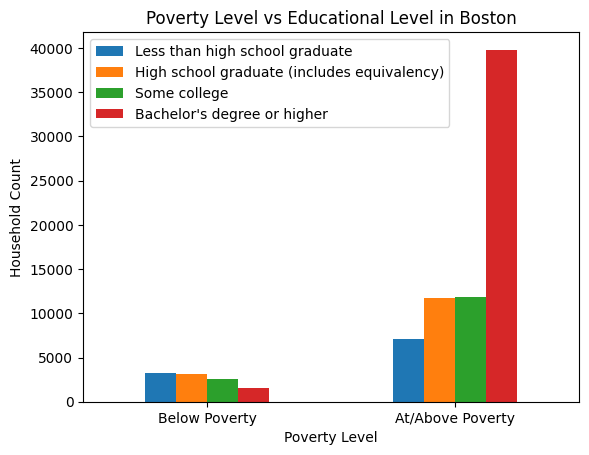

In [256]:
from matplotlib import pyplot as plt

below_poverty_mask = df['Poverty Level'] == 'Below Poverty'
above_poverty_mask = df['Poverty Level'] == 'At/Above Poverty'

lt_high_school_mask = df['Education Level'] == 'Less than high school graduate'
high_school_mask = df['Education Level'] == 'High school graduate (includes equivalency)'
some_college_mask = df['Education Level'] == 'Some college'
bach_or_higher_mask = df['Education Level'] == 'Bachelor\'s degree or higher'

plotdata = pd.DataFrame({
    "Less than high school graduate": [df[below_poverty_mask & lt_high_school_mask]['Total'].sum(),
                                       df[above_poverty_mask & lt_high_school_mask]['Total'].sum()],
    "High school graduate (includes equivalency)": [df[below_poverty_mask & high_school_mask]['Total'].sum(),
                                                    df[above_poverty_mask & high_school_mask]['Total'].sum()],
    "Some college": [df[below_poverty_mask & some_college_mask]['Total'].sum(),
                     df[above_poverty_mask & some_college_mask]['Total'].sum()],
    "Bachelor's degree or higher": [df[below_poverty_mask & bach_or_higher_mask]['Total'].sum(),
                                    df[above_poverty_mask & bach_or_higher_mask]['Total'].sum()]
    }, 
    index=["Below Poverty", "At/Above Poverty"]
)

plotdata.plot(kind="bar")
plt.title("Poverty Level vs Educational Level in Boston")
plt.xlabel("Poverty Level")
plt.ylabel("Household Count")
plt.xticks(rotation=0)
plt.show()

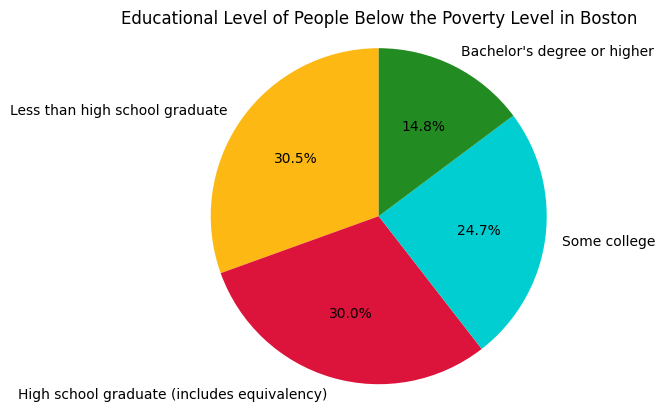

In [255]:
below_poverty_mask = df['Poverty Level'] == 'Below Poverty'

lt_high_school_count = df[below_poverty_mask & lt_high_school_mask]['Total'].sum()
high_school_count = df[below_poverty_mask & high_school_mask]['Total'].sum()
some_college_count = df[below_poverty_mask & some_college_mask]['Total'].sum()
bach_or_higher_count = df[below_poverty_mask & bach_or_higher_mask]['Total'].sum()

counts = [lt_high_school_count, high_school_count, some_college_count, bach_or_higher_count]
labels = ["Less than high school graduate", "High school graduate (includes equivalency)", "Some college", "Bachelor's degree or higher"]
colors = ["#FDB813", "#DC143C", "#00CED1", "#228B22"]

plt.pie(counts, labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("Educational Level of People Below the Poverty Level in Boston")
plt.axis('equal')
plt.show()